# 实验一 地学大数据分析基础

In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


In [4]:
# 读取数据
data = pd.read_excel(r'.\practice1.xlsx',sheet_name='Sheet1',header=0, index_col='No')
print(data.head())

      Zn
No      
1   17.7
2   20.8
3   14.9
4   30.2
5    8.8


In [8]:
# 数据信息统计(这里可以测试其他相关统计方法
print(data.describe())
print(data.mean())

               Zn
count  118.000000
mean    15.607627
std      8.008085
min      3.700000
25%      9.950000
50%     13.650000
75%     20.875000
max     39.300000
Zn    15.607627
dtype: float64


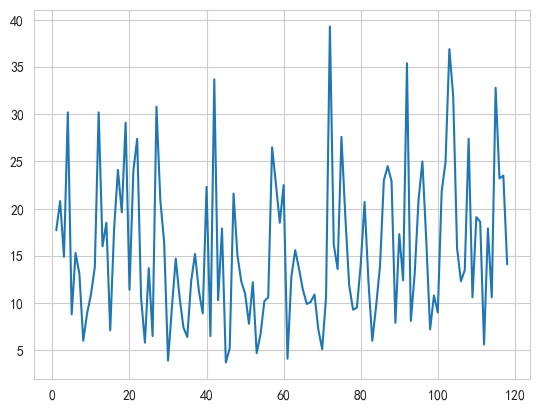

In [10]:
# 绘图
plt.plot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x179e8e8c670>,
 'caps': [<matplotlib.lines.Line2D at 0x179e8e8cbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x179e8e8c3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x179e8e8d0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x179e8e8d390>],
 'means': []}

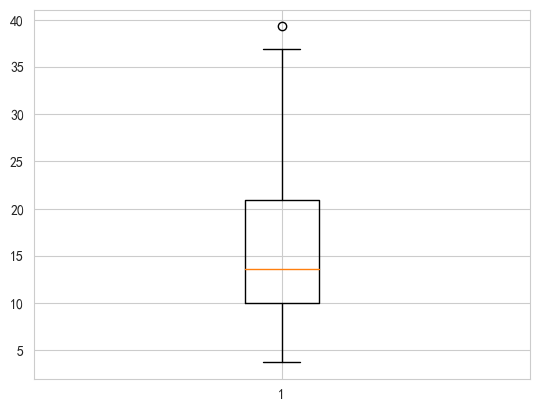

In [15]:
plt.boxplot(data)


(array([17., 23., 24., 16., 10., 14.,  4.,  5.,  3.,  2.]),
 array([ 3.7 ,  7.26, 10.82, 14.38, 17.94, 21.5 , 25.06, 28.62, 32.18,
        35.74, 39.3 ]),
 <BarContainer object of 10 artists>)

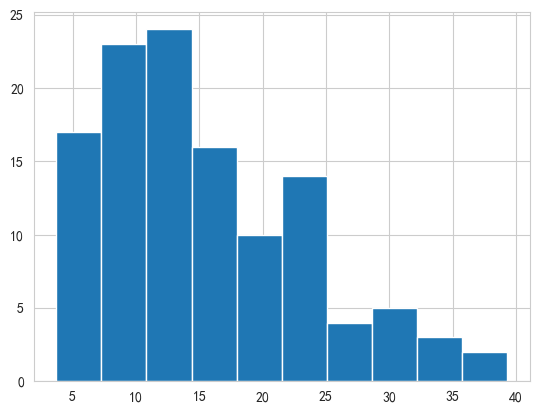

In [14]:
plt.hist(data)

d:\big_data_test\envi\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

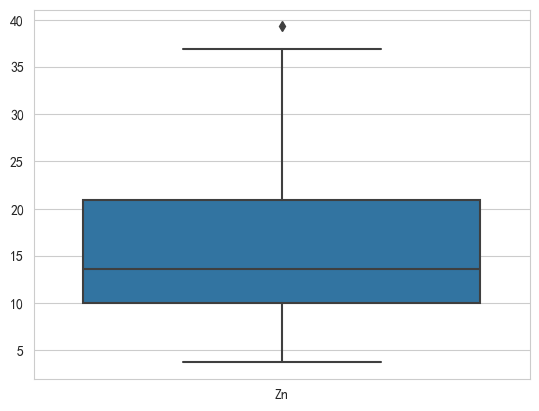

In [21]:
# 这里大家可以使用seaborn库进行绘图
# 详细使用方法请自行百度seaborn相关绘图功能
import seaborn as sns
sns.boxplot(data)

<AxesSubplot: xlabel='No', ylabel='Zn'>

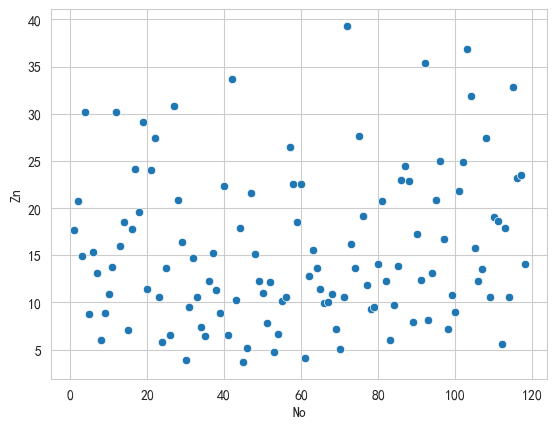

In [20]:
sns.scatterplot(x=data.index,y=data.Zn)

## 拓展练习
现有近1个月全球地震监测记录数据（数据位于practice1.xlsx文件的earthquakes工作表），试运用本实验中的方法对数据进行读取，对数据中的'time', 'place', 'latitude', 'longitude', 'depth', 'mag'等主要参数获取其统计学特征，如对震源深度'depth'、震级'mag'等获取其最大值、中位数等，并结合所学进行可视化分析。
- 请自行完成

# 实验二 探索性数据分析与降维

## 数据清洗
对所给数据进行描述，分别求其中位数、众数、上四分位数、下四分位数、最大值、最小值、下内界值、上内界值、远外值、方差、偏度及峰度，结合数据本身给出分析结论。

In [24]:
# 读取文本文件到数组
import numpy as np
data = np.loadtxt('movie.txt',dtype=float,delimiter=',')
print(data)
# 用numpy库对数据进行探索性分析
data.mean()

[131.  98. 125. 131. 124. 139. 131. 117. 115. 128. 108. 135. 138. 131.
 102. 107. 114. 119. 128. 121. 127. 130. 124. 101. 120. 110. 116. 117.
 110. 128. 128. 115.  99. 115. 136. 126. 134.  95. 138. 117. 111. 122.
 124. 113. 150. 120. 110. 117.  86.  95. 144. 105. 126. 130. 115. 126.
 130. 126. 116. 123. 106. 112. 123.  86. 101.  99. 136. 123. 117. 119.
 105. 127. 123. 128. 125. 104. 109. 134. 125. 127. 105. 120. 142. 127.
 129. 116. 108. 132. 103. 136. 118. 115. 120. 102. 120. 115. 114. 105.
 115. 132. 145. 119. 121. 125. 138. 109. 132. 120. 134. 156. 106. 117.
 127. 144. 139. 139. 119. 140.  83. 110. 102. 123. 107. 115. 136. 118.
 139. 123. 112. 120. 118. 125. 109. 115.  95.  95. 119. 133. 112. 114.
 122. 109. 106. 123. 115. 118. 112. 135. 115. 146. 137. 120. 116. 103.
 144.  83. 123. 111. 110. 111. 125. 126. 114. 140. 103. 130. 181. 117.
 106. 114. 121. 114. 133. 137.  92. 121. 112.  95.  98. 146.  97. 137.
 105.  98. 117. 112.  81. 139. 113. 134. 106. 144. 110. 137. 137. 111.
 104. 

118.372

In [25]:
# 利用scipy.stats模块进行数据相关分析
# https://docs.scipy.org/doc/scipy/tutorial/stats.html
import scipy.stats as st
print('几何平均：',st.gmean(data))
print('调和平均：',st.hmean(data))
print('中位数：\n',np.median(data)) # 中位数

几何平均： 117.35988061554848
调和平均： 116.32115754054888
中位数：
 117.5


## 相关性分析

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


In [26]:
data = pd.read_excel(r'.\practice2.xlsx',sheet_name='exam',header=0)
data.head()

,笔试成绩,实验成绩
0,41,48
1,81,97
2,66,85
3,66,25
4,67,97


In [31]:
# 计算Pearson相关系数
corr = st.pearsonr(x=data.笔试成绩,y=data.实验成绩)
# corr = st.pearsonr(x=data['笔试成绩'],y=data['实验成绩'])
corr

PearsonRResult(statistic=0.37735868527590294, pvalue=0.20368170096210206)

## 主成分分析
请参考主成分分析（xyt）.ipynb，完成实验

# 实验三 分类与预测

# 线性回归

In [39]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [40]:
data = pd.read_csv(r'.\CBM.csv',header=0,index_col='FID')
data.head()

,Wellname,Depth,Romax,Coaltype,Thick,Mad,Aad,Vad,Fcad,Gas,CH4,CO2,N2
FID,,,,,,,,,,,,,
0,M-15,693.2,1.37,mvb,2.75,0.86,7.53,22.37,69.24,8.23,95.15,0.66,4.19
1,M-32,764.8,1.43,mvb,2.94,0.71,6.79,21.37,71.13,11.84,96.54,1.06,2.40
2,M-37,681.2,1.29,mvb,4.16,0.64,7.41,24.09,67.86,9.18,96.20,0.57,1.00
3,M-47,680.6,1.21,mvb,2.40,0.68,7.95,25.79,65.58,6.07,92.24,1.30,5.56
4,M-55,648.5,1.29,mvb,2.54,0.70,7.94,24.14,67.22,5.96,87.51,1.44,7.87


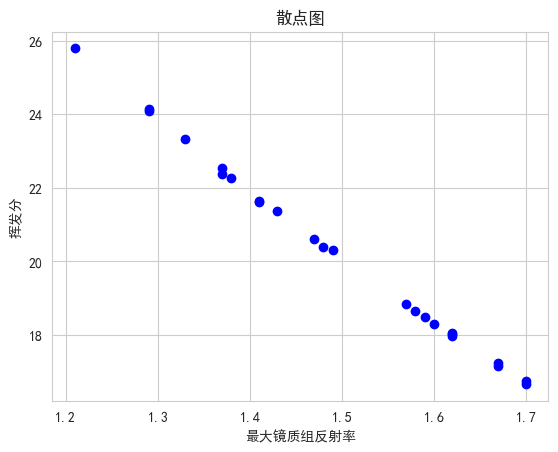

In [41]:
X = data['Romax'].values  #自变量
Y = data['Vad'].values #因变量
# print(X)

plt.scatter(X,Y,marker='o',c='b')
plt.title('散点图')
plt.xlabel('最大镜质组反射率')
plt.ylabel('挥发分')
plt.show()

In [42]:
#一元线性回归的参数估计，OLS算法
# 请结合课堂PPT中的OLS计算方法理解下列2行代码
b=np.sum((X-np.mean(X))*(Y-np.mean(Y)))/np.sum((X-np.mean(X))**2)
a=np.mean(Y)-b*np.mean(X)

print('应用普通最小二乘法估计的回归系数：a=%0.4f,b=%0.4f'%(a,b))
print('回归方程：y=%0.4f + %0.4f x'%(a,b))

应用普通最小二乘法估计的回归系数：a=47.4101,b=-18.1559
回归方程：y=47.4101 + -18.1559 x


回归系数: 
 [[-20.30909091]]
截距: 
 [50.31454545]
均方根误差: 0.25
决定系数: 0.95


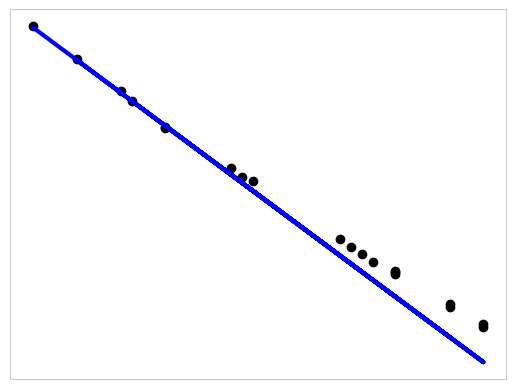

In [43]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# 这里需要二维数组，需要将一维数组转为二维数组
X=X.reshape(X.size,1)
Y=Y.reshape(Y.size,1)
# print(X)
# 把数据分割成训练集和测试集
X_train = X[:-20]
X_test = X[-20:]
Y_train = Y[:-20]
Y_test = Y[-20:]
# 模型搭建
regr = linear_model.LinearRegression()
# 训练模型
regr.fit(X_train,Y_train)
# 用测试集预测
y_pred = regr.predict(X_test)

# 回归系数和截距
print("回归系数: \n", regr.coef_)
print("截距: \n", regr.intercept_)
# 均方根误差
print("均方根误差: %.2f" % mean_squared_error(Y_test, y_pred))
# 决定系数:1为完美预测
print("决定系数: %.2f" % r2_score(Y_test, y_pred))

# 绘图输出
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
weight_model=sm.add_constant(X)
###使用Statsmodels的OLS函数进行线性回归。
result=sm.OLS(Y,weight_model).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     8615.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           4.93e-30
Time:                        09:53:00   Log-Likelihood:                 14.917
No. Observations:                  24   AIC:                            -25.83
Df Residuals:                      22   BIC:                            -23.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.4101      0.294    161.445      0.000      46.801      48.019
x1           -18.1559      0.196    -92.818      0.000     -18.562     -17.750
==============================================================================
Omnibus:                        3.119   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                1.968
Skew:                           0.696   Prob(JB):                        0.374
Kurtosis:                       3.167   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 聚类分析
参考：聚类分析（xyt）.ipynb

In [45]:
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.cluster as sc
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [65]:
data = pd.read_csv(r'.\CBM.csv',header=0,index_col='Wellname')
data.head()

,FID,Depth,Romax,Coaltype,Thick,Mad,Aad,Vad,Fcad,Gas,CH4,CO2,N2
Wellname,,,,,,,,,,,,,
M-15,0,693.2,1.37,mvb,2.75,0.86,7.53,22.37,69.24,8.23,95.15,0.66,4.19
M-32,1,764.8,1.43,mvb,2.94,0.71,6.79,21.37,71.13,11.84,96.54,1.06,2.40
M-37,2,681.2,1.29,mvb,4.16,0.64,7.41,24.09,67.86,9.18,96.20,0.57,1.00
M-47,3,680.6,1.21,mvb,2.40,0.68,7.95,25.79,65.58,6.07,92.24,1.30,5.56
M-55,4,648.5,1.29,mvb,2.54,0.70,7.94,24.14,67.22,5.96,87.51,1.44,7.87


In [67]:
# 丢弃数据中的非数值参数字段，作为索引可以有多种方法，删除不要的是一种方法，也可以根据需要选取列，
X= data.drop(['FID','Coaltype'], axis=1)
X

,Depth,Romax,Thick,Mad,Aad,Vad,Fcad,Gas,CH4,CO2,N2
Wellname,,,,,,,,,,,
M-15,693.2,1.37,2.75,0.86,7.53,22.37,69.24,8.23,95.15,0.66,4.19
M-32,764.8,1.43,2.94,0.71,6.79,21.37,71.13,11.84,96.54,1.06,2.40
M-37,681.2,1.29,4.16,0.64,7.41,24.09,67.86,9.18,96.20,0.57,1.00
M-47,680.6,1.21,2.40,0.68,7.95,25.79,65.58,6.07,92.24,1.30,5.56
M-55,648.5,1.29,2.54,0.70,7.94,24.14,67.22,5.96,87.51,1.44,7.87
M-149,547.4,1.67,1.70,1.00,7.39,17.17,74.44,6.08,83.56,0.80,15.64
M-169,592.7,1.37,1.10,0.84,29.23,22.54,47.39,6.75,95.42,0.46,3.87
M-193,554.2,1.33,1.20,0.68,35.84,23.32,40.16,4.57,60.19,3.34,36.46
M-215,522.5,1.58,2.30,0.79,28.87,18.66,51.68,7.90,69.08,2.15,27.84


In [68]:
# 对原始数据进行标准化:
X_std = (X - np.mean(X,axis=0))/st.tstd(X,axis=0)


In [69]:
# 计算欧式距离矩阵:
dis =dist.pdist(X_std,'euclidean')


In [70]:
# 采用最远距离法进行聚类:
Z =sc.hierarchy.linkage(dis,'complete')


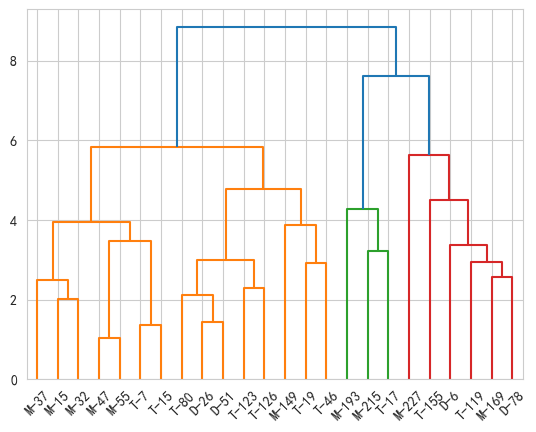

In [71]:
# 绘制谱系图：
row_dendr=sc.hierarchy.dendrogram(Z,labels=X.index)


# 实验四 数字图像处理
参考：7.数字图像处理与机器学习(code)

# 实验五 网络数据爬取与时间序列分析

## 1. 网络数据爬取与分析

In [72]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 28 16:49:11 2020
Get COVID-19 realtime data from WorldMeters website
@author: LUO
"""
import requests
from bs4 import BeautifulSoup
import csv
import time

def get_data(html_text):
    final = []
    bs = BeautifulSoup(html_text, "html.parser")  # 创建BeautifulSoup对象
    body = bs.body # 获取body部分
    data = body.find('table', {'id': 'main_table_countries_today'}) #找到对应id

    thead=data.find('thead')
    th_list=thead.find_all('th')
    temp=[]
    for th in th_list:#get tabel header
        if th.text != None:
            temp.append(th.text)
    final.append(temp)

    tbody=data.find('tbody')
    tr_list=tbody.find_all('tr')
    for tr in tr_list:
        tmp=[]
        td_list=tr.find_all('td')
        for td in td_list:
            tmp.append(td.text)
        final.append(tmp)

    return final

def write_data(data, name):
    file_name = name
    with open(file_name, 'a', errors='ignore', newline='') as f:
            f_csv = csv.writer(f)
            f_csv.writerows(data)

tm=time.strftime('%Y%m%d%H%M%S',time.localtime(time.time()))

url ='https://www.worldometers.info/coronavirus/'
html=requests.get(url)
result = get_data(html.text)
write_data(result, tm+'_COVID_19.csv')


## 2.时间序列数据处理

### 1)案例一：自回归问题

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Fri, 09 Dec 2022   AIC                           5996.884
Time:                        10:13:48   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

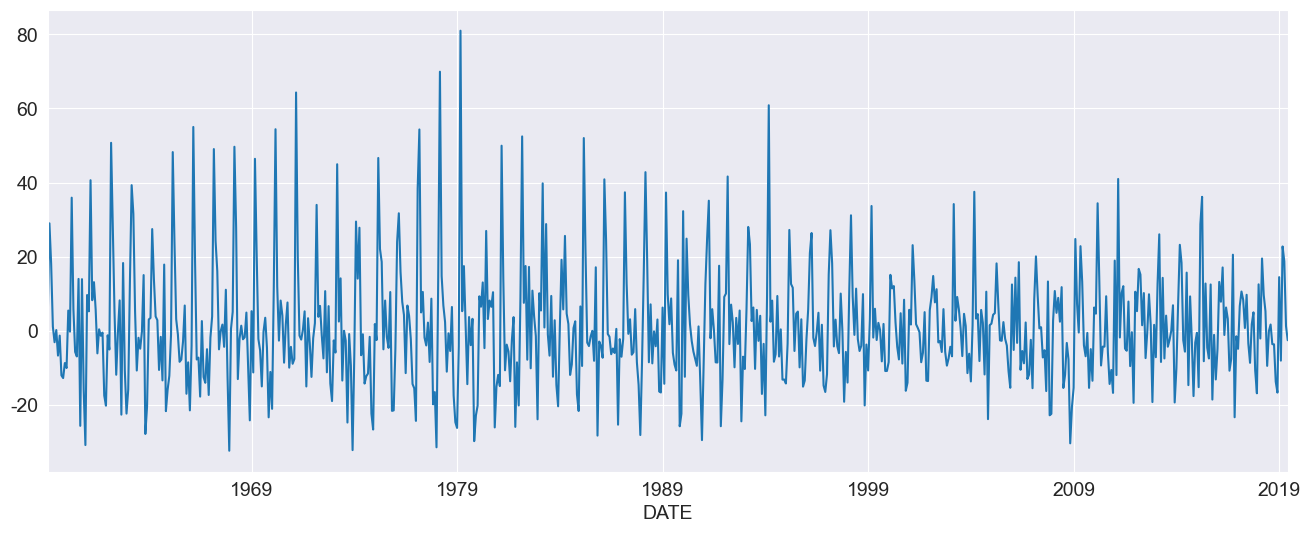

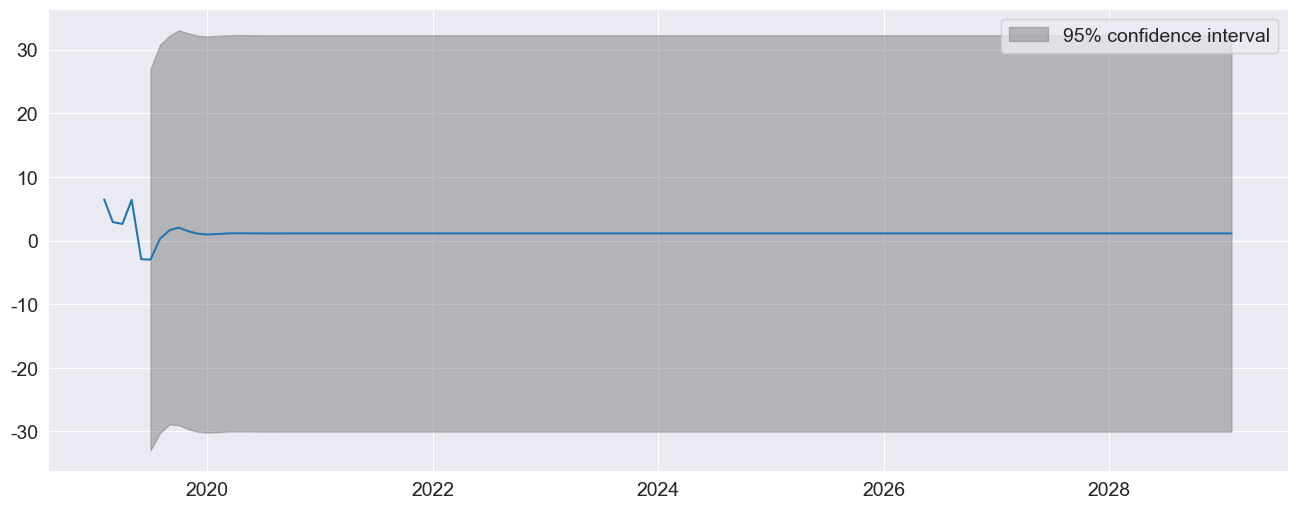

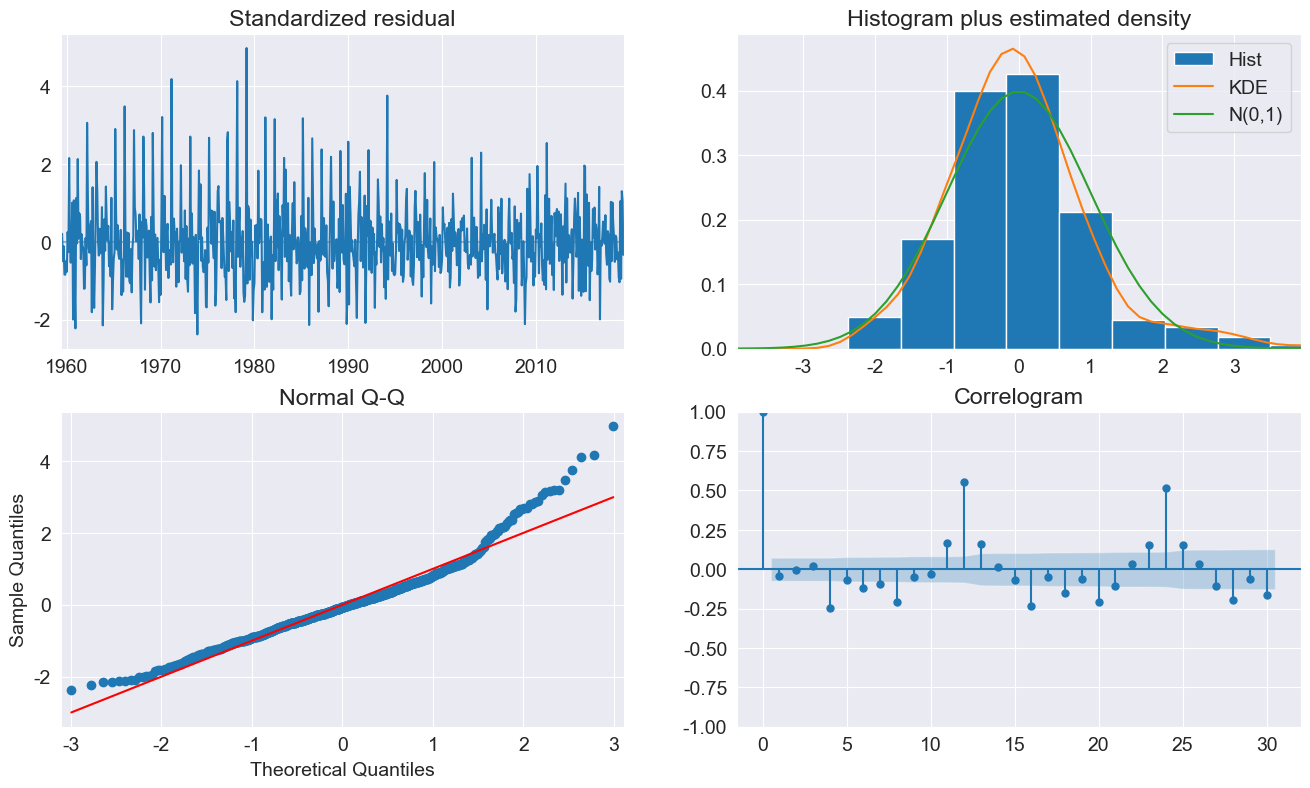

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq("MS")
fig, ax = plt.subplots()
assert isinstance(ax, object)
ax = housing.plot(ax=ax)

mod = AutoReg(housing, 3, old_names=False)
res = mod.fit()
print(res.summary())

fig = res.plot_predict(720, 840)

fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

plt.show()


### 2）案例二：季节动态数据分析

                               AutoReg Model Results                                
Dep. Variable:                     HOUSTNSA   No. Observations:                  714
Model:             Restr. Seas. AutoReg(13)   Log Likelihood                 590.875
Method:                     Conditional MLE   S.D. of innovations              0.104
Date:                      Fri, 09 Dec 2022   AIC                          -1143.751
Time:                              10:14:54   BIC                          -1057.253
Sample:                          02-01-1961   HQIC                         -1110.317
                               - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0167      0.014      1.215      0.224      -0.010       0.044
s(2,12)         -0.0179      0.019     -0.931      0.352      -0.056       0.

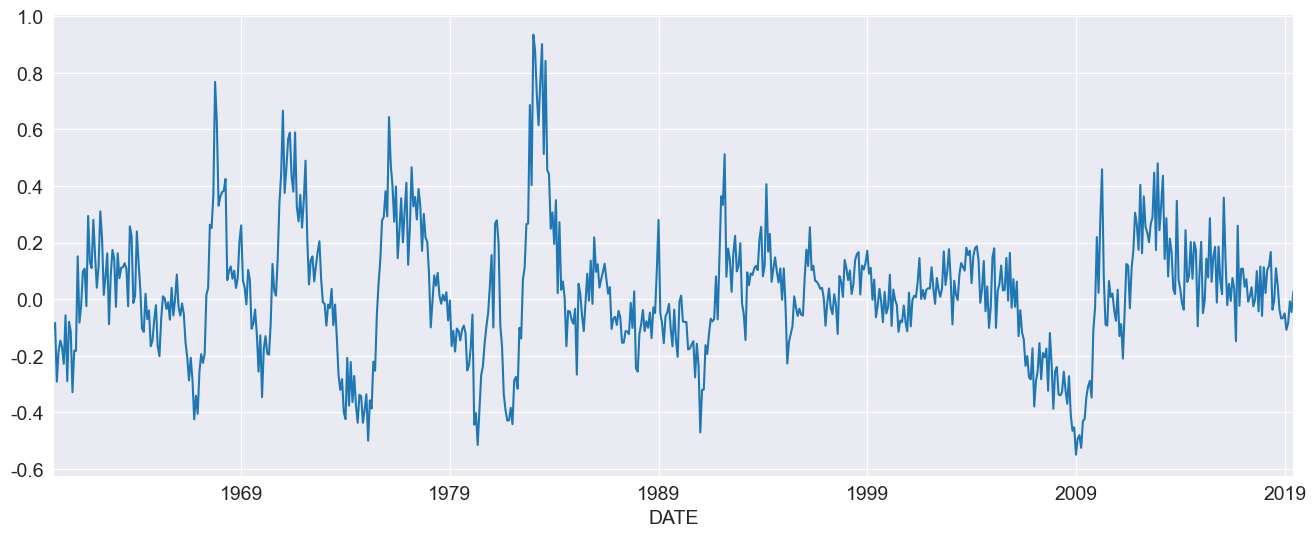

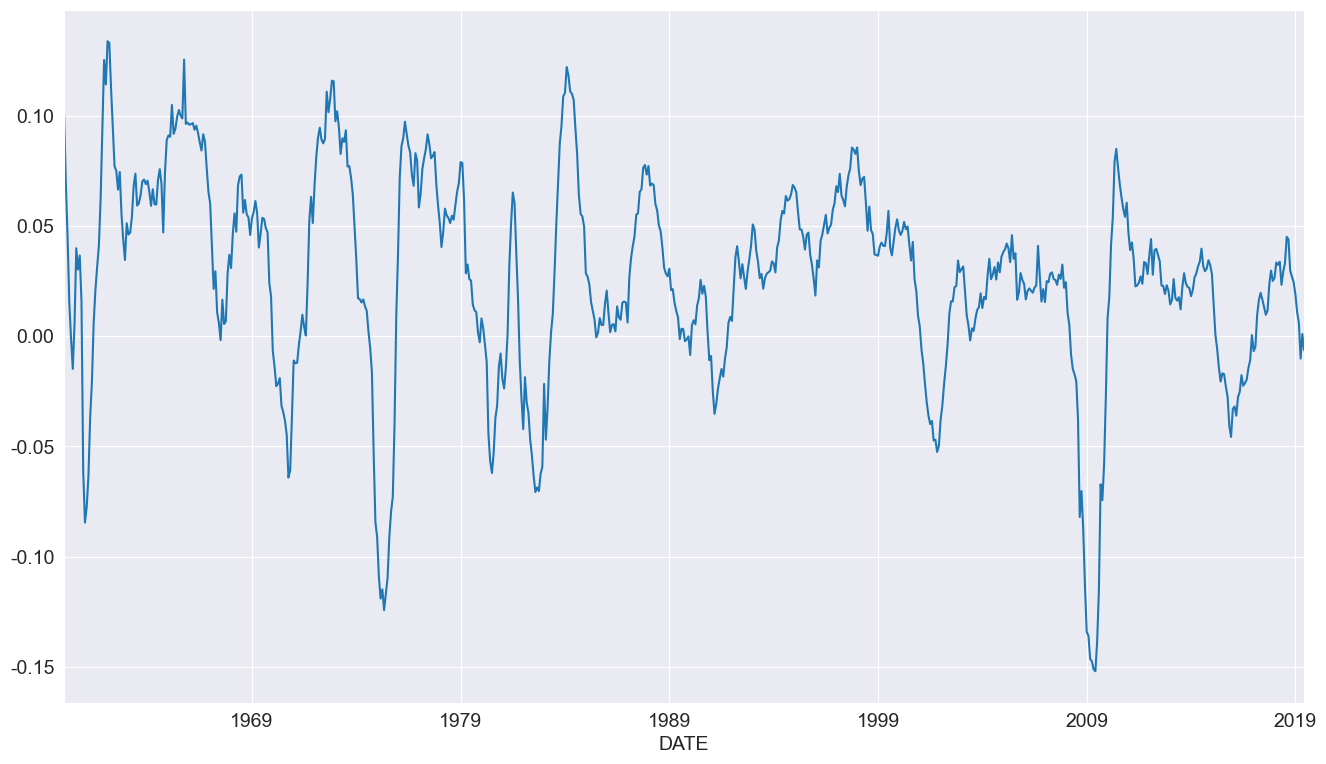

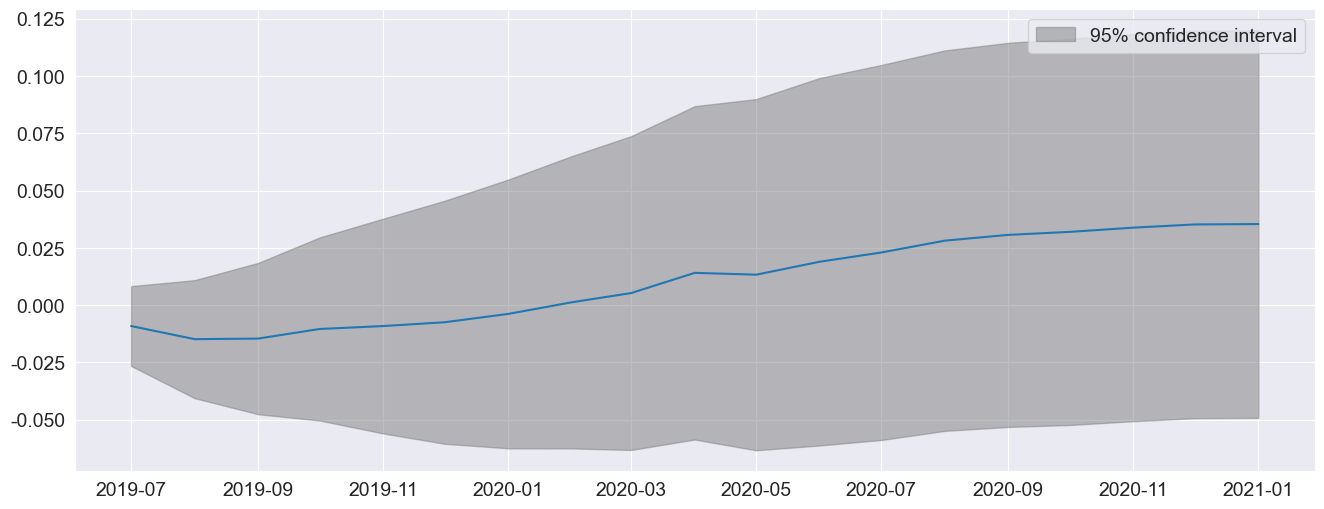

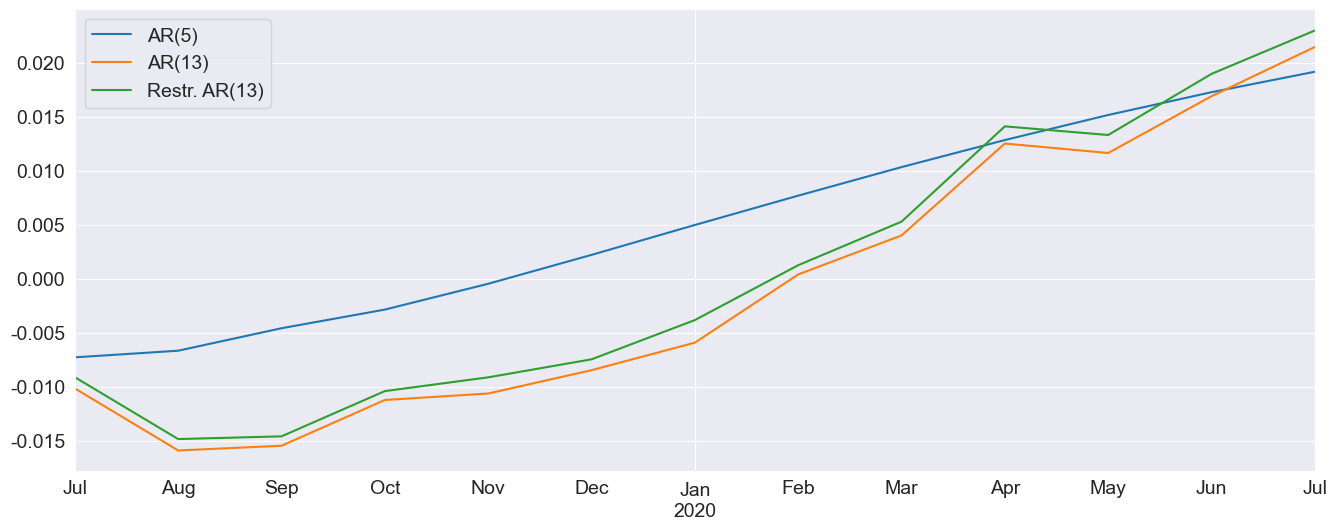

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")

yoy_housing = data.HOUSTNSA.pct_change(12).resample("MS").last().dropna()
_, ax = plt.subplots()
ax = yoy_housing.plot(ax=ax)

sel = ar_select_order(yoy_housing, 13, old_names=False)
sel.ar_lags

sel = ar_select_order(yoy_housing, 13, glob=True, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

data = pdr.get_data_fred("INDPRO", "1959-01-01", "2019-06-01")
ind_prod = data.INDPRO.pct_change(12).dropna().asfreq("MS")
_, ax = plt.subplots(figsize=(16, 9))
ind_prod.plot(ax=ax)

sel = ar_select_order(ind_prod, 13, "bic", old_names=False)
res = sel.model.fit()
print(res.summary())

sel = ar_select_order(ind_prod, 13, "bic", glob=True, old_names=False)
sel.ar_lags
res_glob = sel.model.fit()
print(res.summary())

ind_prod.shape

fig = res_glob.plot_predict(start=714, end=732)

res_ar5 = AutoReg(ind_prod, 5, old_names=False).fit()
predictions = pd.DataFrame(
    {
        "AR(5)": res_ar5.predict(start=714, end=726),
        "AR(13)": res.predict(start=714, end=726),
        "Restr. AR(13)": res_glob.predict(start=714, end=726),
    }
)
_, ax = plt.subplots()
ax = predictions.plot(ax=ax)

plt.show()


## 拓展练习

In [77]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy.linalg as la
import math
# from statsmodels.tsa.arima_model import ARIMA
import time
import statsmodels.api as sm

def preprocess_data(data, time_len, rate, seq_len, pre_len):
    data1 = np.mat(data)
    train_size = int(time_len * rate)
    train_data = data1[0:train_size]
    test_data = data1[train_size:time_len]

    trainX, trainY, testX, testY = [], [], [], []
    for i in range(len(train_data) - seq_len - pre_len):
        a = train_data[i: i + seq_len + pre_len]
        trainX.append(a[0: seq_len])
        trainY.append(a[seq_len: seq_len + pre_len])
    for i in range(len(test_data) - seq_len - pre_len):
        b = test_data[i: i + seq_len + pre_len]
        testX.append(b[0: seq_len])
        testY.append(b[seq_len: seq_len + pre_len])
    return trainX, trainY, testX, testY

###### evaluation ######
def evaluation(a, b):
    rmse = math.sqrt(mean_squared_error(a, b))
    mae = mean_absolute_error(a, b)
    F_norm = la.norm(a - b) / la.norm(a)
    r2 = 1 - ((a - b) ** 2).sum() / ((a - a.mean()) ** 2).sum()
    var = 1 - (np.var(a - b)) / np.var(a)
    return rmse, mae, 1 - F_norm, r2, var

time_start = time.time()
path = r'./432_1800_cql_00001.csv'
data = pd.read_csv(path,encoding='utf-8')

time_len = data.shape[0]
num_nodes = data.shape[1]
train_rate = 0.8
seq_len = 7
pre_len = 1
trainX, trainY, testX, testY = preprocess_data(data, time_len, train_rate, seq_len, pre_len)
method = 'ARIMA'  ####HA or SVR or ARIMA

######## ARIMA #########
if method == 'ARIMA':
    rng = pd.date_range('1/3/2012', periods=1379, freq='D')
    a1 = pd.DatetimeIndex(rng)
    data.index = a1
    num = data.shape[1]
    rmse, mae, acc, r2, var, pred, ori = [], [], [], [], [], [], []
    for i in range(3):
        ts = data.iloc[:, i]
        ts_log = np.log(ts)
        ts_log = ts
        ts_log = np.array(ts_log, dtype=np.float)
        where_are_inf = np.isinf(ts_log)
        ts_log[where_are_inf] = 0
        ts_log = pd.Series(ts_log)
        ts_log.index = a1
        model = sm.tsa.arima.ARIMA(ts_log, order=(1, 1, 1))
        # model = ARIMA(ts_log, order=[1, 0, 0])
        properModel = model.fit()
        predict_ts = properModel.predict(4, dynamic=True)
        log_recover = np.exp(predict_ts)
        log_recover = predict_ts
        ts = ts[log_recover.index]
        path = './output/'
        name = 'logrecover_' + str(i) + '.csv'
        logrecover = pd.DataFrame(log_recover)
        logrecover.to_csv(path + name)
        er_rmse, er_mae, er_acc, r2_score, var_score = evaluation(ts, log_recover)
        rmse.append(er_rmse)
        mae.append(er_mae)
        acc.append(er_acc)
        r2.append(r2_score)
        var.append(var_score)
    #    for i in range(109,num):
    #        ts = data.iloc[:,i]
    #        ts_log=np.log(ts)
    #        ts_log=np.array(ts_log,dtype=np.float)
    #        where_are_inf = np.isinf(ts_log)
    #        ts_log[where_are_inf] = 0
    #        ts_log = pd.Series(ts_log)
    #        ts_log.index = a1
    #        model = ARIMA(ts_log,order=[1,1,1])
    #        properModel = model.fit(disp=-1, method='css')
    #        predict_ts = properModel.predict(2, dynamic=True)
    #        log_recover = np.exp(predict_ts)
    #        ts = ts[log_recover.index]
    #        er_rmse,er_mae,er_acc,r2_score,var_score = evaluation(ts,log_recover)
    #        rmse.append(er_rmse)
    #        mae.append(er_mae)
    #        acc.append(er_acc)
    #        r2.append(r2_score)
    #        var.append(var_score)
    acc1 = np.mat(acc)
    acc1[acc1 < 0] = 0
    print('arima_rmse:%r' % (np.mean(rmse)),
          'arima_mae:%r' % (np.mean(mae)),
          'arima_acc:%r' % (np.mean(acc1)),
          'arima_r2:%r' % (np.mean(r2)),
          'arima_var:%r' % (np.mean(var)))

time_end = time.time()
print(time_end - time_start, 's')


d:\big_data_test\envi\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_55692\85888288.py:60: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ts_log = np.array(ts_log, dtype=np.float)
d:\big_data_test\envi\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\big_data_test\envi\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


arima_rmse:1990.707176808529 arima_mae:1889.0838425026375 arima_acc:0.3365756120035586 arima_r2:-6.229833383368507 arima_var:0.0004590240512165611
0.5223891735076904 s


d:\big_data_test\envi\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 分析研究PM2.5爬取及分析代码，掌握常用的一些数据分析方法
参考代码：